In [1]:
# Imports nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud
from datasets import load_dataset
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("✅ Imports réalisés avec succès")


✅ Imports réalisés avec succès


In [2]:
# Chargement direct du dataset Amazon Polarity (méthode recommandée)
print("🔄 Chargement du dataset Amazon Polarity...")

# Chargement complet du dataset (peut prendre quelques minutes)
ds = load_dataset("fancyzhx/amazon_polarity")

print("✅ Dataset chargé avec succès!")
print(f"   - Train: {len(ds['train']):,} échantillons")
print(f"   - Test: {len(ds['test']):,} échantillons")

# Affichage de la structure
print(f"\n📊 Structure du dataset:")
print(f"   - Features: {ds['train'].features}")

# Premier échantillon pour comprendre la structure
print(f"\n📋 Premier échantillon (train):")
sample = ds['train'][0]
print(f"   - Label: {sample['label']} ({'Positif' if sample['label'] == 1 else 'Négatif'})")
print(f"   - Titre: {sample['title']}")
print(f"   - Contenu: {sample['content'][:300]}...")


🔄 Chargement du dataset Amazon Polarity...
✅ Dataset chargé avec succès!
   - Train: 3,600,000 échantillons
   - Test: 400,000 échantillons

📊 Structure du dataset:
   - Features: {'label': ClassLabel(names=['negative', 'positive'], id=None), 'title': Value(dtype='string', id=None), 'content': Value(dtype='string', id=None)}

📋 Premier échantillon (train):
   - Label: 1 (Positif)
   - Titre: Stuning even for the non-gamer
   - Contenu: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher st...


In [3]:
# Conversion en DataFrames pandas pour faciliter l'analyse
print("🔄 Conversion en DataFrames pandas...")

# Conversion des datasets Hugging Face en DataFrames
train_df = pd.DataFrame(ds['train'])
test_df = pd.DataFrame(ds['test'])

# Ajout de colonnes utiles pour l'analyse
train_df['text_length'] = train_df['content'].str.len()
train_df['title_length'] = train_df['title'].str.len()
train_df['combined_text'] = train_df['title'] + " " + train_df['content']
train_df['combined_length'] = train_df['combined_text'].str.len()

test_df['text_length'] = test_df['content'].str.len()
test_df['title_length'] = test_df['title'].str.len()
test_df['combined_text'] = test_df['title'] + " " + test_df['content']
test_df['combined_length'] = test_df['combined_text'].str.len()

print("✅ Conversion terminée!")
print(f"   - DataFrame train: {train_df.shape}")
print(f"   - DataFrame test: {test_df.shape}")

# Aperçu des DataFrames
print("\n📋 Aperçu du DataFrame train:")
display(train_df.head())


🔄 Conversion en DataFrames pandas...
✅ Conversion terminée!
   - DataFrame train: (3600000, 7)
   - DataFrame test: (400000, 7)

📋 Aperçu du DataFrame train:


label                                              title  \
0      1                     Stuning even for the non-gamer   
1      1              The best soundtrack ever to anything.   
2      1                                           Amazing!   
3      1                               Excellent Soundtrack   
4      1  Remember, Pull Your Jaw Off The Floor After He...   

                                             content  text_length  \
0  This sound track was beautiful! It paints the ...          394   
1  I'm reading a lot of reviews saying that this ...          470   
2  This soundtrack is my favorite music of all ti...          750   
3  I truly like this soundtrack and I enjoy video...          721   
4  If you've played the game, you know how divine...          425   

   title_length                                      combined_text  \
0            30  Stuning even for the non-gamer This sound trac...   
1            37  The best soundtrack ever to anything. I'm read...   
2             8  Amazing! This soundtrack is my favorite music ...   
3            20  Excellent Soundtrack I truly like this soundtr...   
4            54  Remember, Pull Your Jaw Off The Floor After He...   

   combined_length  
0              425  
1              508  
2              759  
3              742  
4              480

In [4]:
# Informations générales sur le dataset
print("📊 INFORMATIONS GÉNÉRALES:")
print(f"   - Taille du dataset d'entraînement: {len(train_df):,}")
print(f"   - Taille du dataset de test: {len(test_df):,}")
print(f"   - Nombre total d'avis: {len(train_df) + len(test_df):,}")

# Distribution des classes
print(f"\n📈 DISTRIBUTION DES CLASSES (Train):")
train_counts = train_df['label'].value_counts().sort_index()
for label, count in train_counts.items():
    sentiment = 'Positif' if label == 1 else 'Négatif'
    percentage = count / len(train_df) * 100
    print(f"   - {sentiment} (label={label}): {count:,} ({percentage:.1f}%)")

print(f"\n📈 DISTRIBUTION DES CLASSES (Test):")
test_counts = test_df['label'].value_counts().sort_index()
for label, count in test_counts.items():
    sentiment = 'Positif' if label == 1 else 'Négatif'
    percentage = count / len(test_df) * 100
    print(f"   - {sentiment} (label={label}): {count:,} ({percentage:.1f}%)")

# Statistiques des longueurs de texte
print(f"\n📏 STATISTIQUES DES LONGUEURS:")
print(f"Titre:")
print(f"   - Moyenne: {train_df['title_length'].mean():.0f} caractères")
print(f"   - Médiane: {train_df['title_length'].median():.0f} caractères")
print(f"   - Min/Max: {train_df['title_length'].min()}/{train_df['title_length'].max()}")

print(f"Contenu:")
print(f"   - Moyenne: {train_df['text_length'].mean():.0f} caractères")
print(f"   - Médiane: {train_df['text_length'].median():.0f} caractères")
print(f"   - Min/Max: {train_df['text_length'].min()}/{train_df['text_length'].max()}")

print(f"Texte combiné (titre + contenu):")
print(f"   - Moyenne: {train_df['combined_length'].mean():.0f} caractères")
print(f"   - Médiane: {train_df['combined_length'].median():.0f} caractères")


📊 INFORMATIONS GÉNÉRALES:
   - Taille du dataset d'entraînement: 3,600,000
   - Taille du dataset de test: 400,000
   - Nombre total d'avis: 4,000,000

📈 DISTRIBUTION DES CLASSES (Train):
   - Négatif (label=0): 1,800,000 (50.0%)
   - Positif (label=1): 1,800,000 (50.0%)

📈 DISTRIBUTION DES CLASSES (Test):
   - Négatif (label=0): 200,000 (50.0%)
   - Positif (label=1): 200,000 (50.0%)

📏 STATISTIQUES DES LONGUEURS:
Titre:
   - Moyenne: 25 caractères
   - Médiane: 21 caractères
   - Min/Max: 0/139
Contenu:
   - Moyenne: 405 caractères
   - Médiane: 356 caractères
   - Min/Max: 4/1010
Texte combiné (titre + contenu):
   - Moyenne: 431 caractères
   - Médiane: 382 caractères


In [5]:
# Visualisation de la distribution des classes
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Distribution Train', 'Distribution Test'),
    specs=[[{'type': 'pie'}, {'type': 'pie'}]]
)

# Train pie chart
fig.add_trace(
    go.Pie(
        labels=['Négatif', 'Positif'],
        values=[train_counts[0], train_counts[1]],
        name="Train",
        marker_colors=['#DC143C', '#2E8B57']
    ),
    row=1, col=1
)

# Test pie chart
fig.add_trace(
    go.Pie(
        labels=['Négatif', 'Positif'],
        values=[test_counts[0], test_counts[1]],
        name="Test",
        marker_colors=['#DC143C', '#2E8B57']
    ),
    row=1, col=2
)

fig.update_layout(
    title_text="Distribution des Classes - Amazon Polarity Dataset",
    title_x=0.5,
    height=400
)

fig.show()


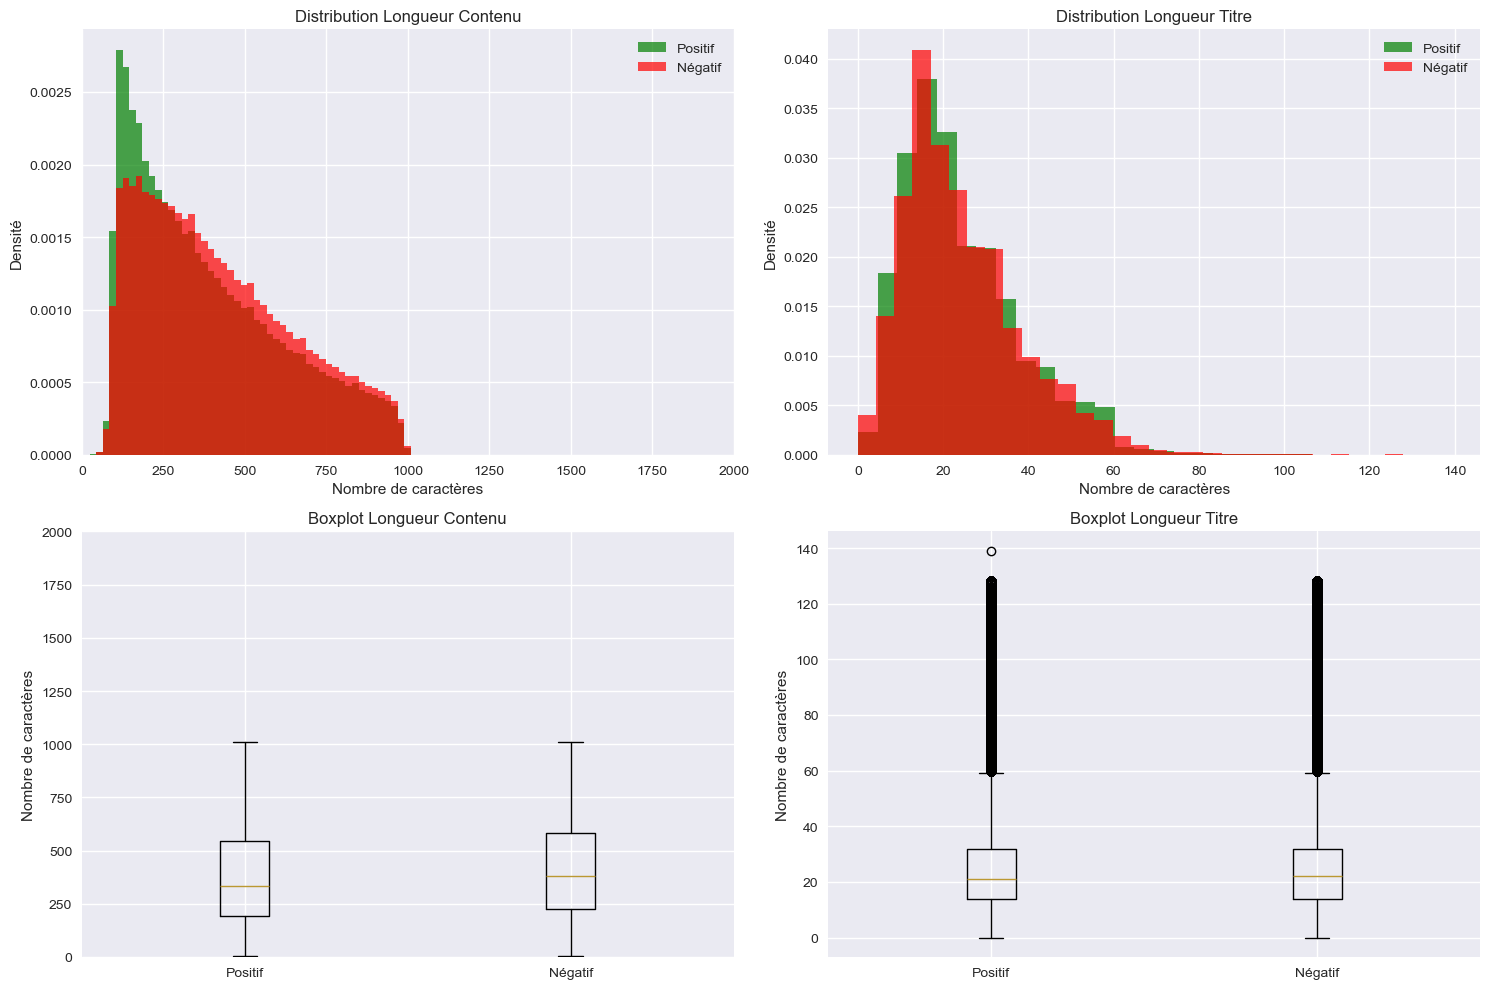

📊 Observations sur les longueurs:
   - Les avis positifs ont une longueur moyenne de 389 caractères
   - Les avis négatifs ont une longueur moyenne de 421 caractères
   - Différence de longueur: 31 caractères


In [6]:
# Visualisation des distributions de longueur
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Séparer les données par sentiment
pos_train = train_df[train_df['label'] == 1]
neg_train = train_df[train_df['label'] == 0]

# Distribution longueur contenu
axes[0,0].hist(pos_train['text_length'], bins=50, alpha=0.7, label='Positif', color='green', density=True)
axes[0,0].hist(neg_train['text_length'], bins=50, alpha=0.7, label='Négatif', color='red', density=True)
axes[0,0].set_title('Distribution Longueur Contenu')
axes[0,0].set_xlabel('Nombre de caractères')
axes[0,0].set_ylabel('Densité')
axes[0,0].legend()
axes[0,0].set_xlim(0, 2000)  # Zoom sur les valeurs communes

# Distribution longueur titre
axes[0,1].hist(pos_train['title_length'], bins=30, alpha=0.7, label='Positif', color='green', density=True)
axes[0,1].hist(neg_train['title_length'], bins=30, alpha=0.7, label='Négatif', color='red', density=True)
axes[0,1].set_title('Distribution Longueur Titre')
axes[0,1].set_xlabel('Nombre de caractères')
axes[0,1].set_ylabel('Densité')
axes[0,1].legend()

# Boxplot longueur contenu
data_content = [pos_train['text_length'], neg_train['text_length']]
axes[1,0].boxplot(data_content, labels=['Positif', 'Négatif'])
axes[1,0].set_title('Boxplot Longueur Contenu')
axes[1,0].set_ylabel('Nombre de caractères')
axes[1,0].set_ylim(0, 2000)

# Boxplot longueur titre
data_title = [pos_train['title_length'], neg_train['title_length']]
axes[1,1].boxplot(data_title, labels=['Positif', 'Négatif'])
axes[1,1].set_title('Boxplot Longueur Titre')
axes[1,1].set_ylabel('Nombre de caractères')

plt.tight_layout()
plt.show()

print("📊 Observations sur les longueurs:")
print(f"   - Les avis positifs ont une longueur moyenne de {pos_train['text_length'].mean():.0f} caractères")
print(f"   - Les avis négatifs ont une longueur moyenne de {neg_train['text_length'].mean():.0f} caractères")
print(f"   - Différence de longueur: {abs(pos_train['text_length'].mean() - neg_train['text_length'].mean()):.0f} caractères")


In [7]:
# Affichage d'échantillons d'avis pour mieux comprendre les données
print("🟢 ÉCHANTILLONS D'AVIS POSITIFS:")
print("=" * 60)

positive_samples = pos_train.sample(n=3, random_state=42)
for i, (idx, row) in enumerate(positive_samples.iterrows()):
    print(f"\n📝 Avis Positif #{i+1}:")
    print(f"   Titre: {row['title']}")
    print(f"   Contenu: {row['content'][:400]}...")
    print(f"   Longueur: {row['text_length']} caractères")

print("\n" + "=" * 60)
print("🔴 ÉCHANTILLONS D'AVIS NÉGATIFS:")
print("=" * 60)

negative_samples = neg_train.sample(n=3, random_state=42)
for i, (idx, row) in enumerate(negative_samples.iterrows()):
    print(f"\n📝 Avis Négatif #{i+1}:")
    print(f"   Titre: {row['title']}")
    print(f"   Contenu: {row['content'][:400]}...")
    print(f"   Longueur: {row['text_length']} caractères")


🟢 ÉCHANTILLONS D'AVIS POSITIFS:

📝 Avis Positif #1:
   Titre: Perfect Mantra
   Contenu: I've been looking for this mantra for a long time. My children at yoga and me are very glad that this lotus mantra is making our class more enjoyable. Recommended even for adults with the motion of lotusflower opening and going back into the ground....
   Longueur: 249 caractères

📝 Avis Positif #2:
   Titre: Quality
   Contenu: I'm just a little disapointed with the quality of the Metal Case, cause the only thing I saw was the photo on the web...
   Longueur: 117 caractères

📝 Avis Positif #3:
   Titre: Exceptional murder-mystery writer scores big.
   Contenu: Being a purveyor of exceptional mystery and crime novels, what a pleasant surprise to find one of my random picks turning out so well. Parker has an uncanny grasp of the lifestyle in orange county and a keen insight into the personalities of its inhabitants. Naughton is a true crime noir treat, and Parker's personalization of him evokes the 

In [8]:
# Sauvegarde des DataFrames traités
import os

# Créer le dossier processed s'il n'existe pas
os.makedirs('../data/processed', exist_ok=True)

print("💾 Sauvegarde des données traitées...")

# Sauvegarde en CSV
train_df.to_csv('../data/processed/train.csv', index=False)
test_df.to_csv('../data/processed/test.csv', index=False)

# Sauvegarde en Parquet (plus efficace pour les gros datasets)
train_df.to_parquet('../data/processed/train.parquet')
test_df.to_parquet('../data/processed/test.parquet')

# Sauvegarde des statistiques
import json

stats_dict = {
    'dataset_info': {
        'train_size': len(train_df),
        'test_size': len(test_df),
        'total_size': len(train_df) + len(test_df),
        'features': ['label', 'title', 'content']
    },
    'class_distribution': {
        'train': {
            'positive': int(train_counts[1]),
            'negative': int(train_counts[0])
        },
        'test': {
            'positive': int(test_counts[1]),
            'negative': int(test_counts[0])
        }
    },
    'text_statistics': {
        'title_length': {
            'mean': float(train_df['title_length'].mean()),
            'median': float(train_df['title_length'].median()),
            'min': int(train_df['title_length'].min()),
            'max': int(train_df['title_length'].max())
        },
        'content_length': {
            'mean': float(train_df['text_length'].mean()),
            'median': float(train_df['text_length'].median()),
            'min': int(train_df['text_length'].min()),
            'max': int(train_df['text_length'].max())
        },
        'combined_length': {
            'mean': float(train_df['combined_length'].mean()),
            'median': float(train_df['combined_length'].median()),
            'min': int(train_df['combined_length'].min()),
            'max': int(train_df['combined_length'].max())
        }
    }
}

with open('../data/processed/dataset_stats.json', 'w') as f:
    json.dump(stats_dict, f, indent=2)

print("✅ Sauvegarde terminée!")
print("\n📁 Fichiers créés:")
print("   - ../data/processed/train.csv")
print("   - ../data/processed/test.csv")
print("   - ../data/processed/train.parquet")
print("   - ../data/processed/test.parquet")
print("   - ../data/processed/dataset_stats.json")

print(f"\n🎯 RÉSUMÉ DE L'EXPLORATION:")
print(f"   - Dataset Amazon Polarity chargé avec succès")
print(f"   - {len(train_df):,} avis d'entraînement, {len(test_df):,} avis de test")
print(f"   - Distribution équilibrée: 50% positif, 50% négatif")
print(f"   - Longueur moyenne des avis: {train_df['combined_length'].mean():.0f} caractères")
print(f"   - Données prêtes pour la modélisation!")


💾 Sauvegarde des données traitées...
✅ Sauvegarde terminée!

📁 Fichiers créés:
   - ../data/processed/train.csv
   - ../data/processed/test.csv
   - ../data/processed/train.parquet
   - ../data/processed/test.parquet
   - ../data/processed/dataset_stats.json

🎯 RÉSUMÉ DE L'EXPLORATION:
   - Dataset Amazon Polarity chargé avec succès
   - 3,600,000 avis d'entraînement, 400,000 avis de test
   - Distribution équilibrée: 50% positif, 50% négatif
   - Longueur moyenne des avis: 431 caractères
   - Données prêtes pour la modélisation!


In [9]:
# Analyse des longueurs de mots et phrases
import re
import nltk
from collections import Counter

# Télécharger les ressources NLTK si nécessaire
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

def analyze_text_features(df, sample_size=10000):
    """Analyse détaillée des caractéristiques textuelles"""
    # Échantillonner pour accélérer l'analyse
    sample_df = df.sample(n=min(sample_size, len(df)), random_state=42)
    
    features = []
    for _, row in sample_df.iterrows():
        text = row['combined_text']
        
        # Compter les mots
        words = re.findall(r'\b\w+\b', text.lower())
        word_count = len(words)
        
        # Compter les phrases
        sentences = nltk.sent_tokenize(text)
        sentence_count = len(sentences)
        
        # Mots uniques
        unique_words = len(set(words))
        
        # Caractères spéciaux
        special_chars = len(re.findall(r'[!@#$%^&*(),.?":{}|<>]', text))
        
        # Mots en majuscules
        caps_words = len(re.findall(r'\b[A-Z]{2,}\b', text))
        
        # Points d'exclamation et d'interrogation
        exclamation_marks = text.count('!')
        question_marks = text.count('?')
        
        features.append({
            'label': row['label'],
            'word_count': word_count,
            'sentence_count': sentence_count,
            'unique_words': unique_words,
            'vocabulary_richness': unique_words / word_count if word_count > 0 else 0,
            'avg_words_per_sentence': word_count / sentence_count if sentence_count > 0 else 0,
            'special_chars': special_chars,
            'caps_words': caps_words,
            'exclamation_marks': exclamation_marks,
            'question_marks': question_marks,
            'char_length': len(text)
        })
    
    return pd.DataFrame(features)

print("🔄 Analyse des caractéristiques textuelles avancées...")
text_features_df = analyze_text_features(train_df, sample_size=50000)
print("✅ Analyse terminée!")

# Statistiques par sentiment
pos_features = text_features_df[text_features_df['label'] == 1]
neg_features = text_features_df[text_features_df['label'] == 0]

print("\n📊 STATISTIQUES TEXTUELLES AVANCÉES:")
print("\n🟢 AVIS POSITIFS:")
print(f"   - Mots par avis: {pos_features['word_count'].mean():.1f} ± {pos_features['word_count'].std():.1f}")
print(f"   - Phrases par avis: {pos_features['sentence_count'].mean():.1f} ± {pos_features['sentence_count'].std():.1f}")
print(f"   - Richesse vocabulaire: {pos_features['vocabulary_richness'].mean():.3f}")
print(f"   - Mots par phrase: {pos_features['avg_words_per_sentence'].mean():.1f}")
print(f"   - Points d'exclamation: {pos_features['exclamation_marks'].mean():.2f}")

print("\n🔴 AVIS NÉGATIFS:")
print(f"   - Mots par avis: {neg_features['word_count'].mean():.1f} ± {neg_features['word_count'].std():.1f}")
print(f"   - Phrases par avis: {neg_features['sentence_count'].mean():.1f} ± {neg_features['sentence_count'].std():.1f}")
print(f"   - Richesse vocabulaire: {neg_features['vocabulary_richness'].mean():.3f}")
print(f"   - Mots par phrase: {neg_features['avg_words_per_sentence'].mean():.1f}")
print(f"   - Points d'exclamation: {neg_features['exclamation_marks'].mean():.2f}")


🔄 Analyse des caractéristiques textuelles avancées...
✅ Analyse terminée!

📊 STATISTIQUES TEXTUELLES AVANCÉES:

🟢 AVIS POSITIFS:
   - Mots par avis: 77.5 ± 44.2
   - Phrases par avis: 4.8 ± 2.6
   - Richesse vocabulaire: 0.756
   - Mots par phrase: 18.2
   - Points d'exclamation: 1.01

🔴 AVIS NÉGATIFS:
   - Mots par avis: 84.5 ± 44.3
   - Phrases par avis: 5.2 ± 2.8
   - Richesse vocabulaire: 0.745
   - Mots par phrase: 18.6
   - Points d'exclamation: 0.79


In [10]:
# Graphiques avancés avec Plotly
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# 1. Dashboard de comparaison des caractéristiques
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=('Nombre de Mots', 'Richesse Vocabulaire', 'Mots par Phrase',
                   'Points d\'Exclamation', 'Phrases par Avis', 'Caractères Spéciaux'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}, {"secondary_y": False}]]
)

# Histogrammes comparatifs
features_to_plot = [
    ('word_count', 'Nombre de Mots'),
    ('vocabulary_richness', 'Richesse Vocabulaire'),
    ('avg_words_per_sentence', 'Mots par Phrase'),
    ('exclamation_marks', 'Points d\'Exclamation'),
    ('sentence_count', 'Phrases par Avis'),
    ('special_chars', 'Caractères Spéciaux')
]

positions = [(1,1), (1,2), (1,3), (2,1), (2,2), (2,3)]

for i, ((feature, title), (row, col)) in enumerate(zip(features_to_plot, positions)):
    # Données positives
    fig.add_histogram(
        x=pos_features[feature],
        name='Positif',
        marker_color='green',
        opacity=0.7,
        nbinsx=30,
        legendgroup='sentiment',
        showlegend=(i==0),
        row=row, col=col
    )
    
    # Données négatives
    fig.add_histogram(
        x=neg_features[feature],
        name='Négatif',
        marker_color='red',
        opacity=0.7,
        nbinsx=30,
        legendgroup='sentiment',
        showlegend=(i==0),
        row=row, col=col
    )

fig.update_layout(
    title_text="Dashboard Comparatif des Caractéristiques Textuelles",
    title_x=0.5,
    height=800,
    barmode='overlay'
)

fig.show()


In [11]:
# 2. Analyse de corrélation avancée
correlation_features = ['word_count', 'sentence_count', 'vocabulary_richness', 
                       'avg_words_per_sentence', 'exclamation_marks', 'question_marks',
                       'special_chars', 'caps_words', 'char_length']

corr_matrix = text_features_df[correlation_features + ['label']].corr()

# Heatmap de corrélation interactive
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='RdBu',
    zmid=0,
    text=corr_matrix.round(3).values,
    texttemplate="%{text}",
    textfont={"size": 10},
    hoverongaps=False
))

fig.update_layout(
    title="Matrice de Corrélation des Caractéristiques Textuelles",
    title_x=0.5,
    width=800,
    height=700
)

fig.show()

# Affichage des corrélations les plus importantes avec le label
label_correlations = corr_matrix['label'].abs().sort_values(ascending=False)
print("\n🔍 CORRÉLATIONS AVEC LE SENTIMENT (valeurs absolues):")
for feature, corr in label_correlations.items():
    if feature != 'label':
        direction = "+" if corr_matrix['label'][feature] > 0 else "-"
        print(f"   {feature}: {direction}{abs(corr):.4f}")



🔍 CORRÉLATIONS AVEC LE SENTIMENT (valeurs absolues):
   question_marks: -0.1115
   word_count: -0.0787
   char_length: -0.0732
   sentence_count: -0.0724
   special_chars: -0.0672
   vocabulary_richness: +0.0593
   exclamation_marks: +0.0333
   caps_words: -0.0253
   avg_words_per_sentence: -0.0164


In [12]:
# 3. Analyse des mots les plus fréquents avec WordCloud avancé
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Télécharger les ressources nécessaires
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

def get_word_frequencies(texts, sentiment_label, max_words=1000):
    """Analyse des fréquences de mots pour un sentiment donné"""
    # Combiner tous les textes
    all_text = " ".join(texts[:max_words])  # Limiter pour la performance
    
    # Nettoyer et tokeniser
    tokens = word_tokenize(all_text.lower())
    
    # Supprimer la ponctuation et les stop words
    stop_words = set(stopwords.words('english'))
    cleaned_tokens = [
        token for token in tokens 
        if token not in stop_words 
        and token not in string.punctuation 
        and len(token) > 2
        and token.isalpha()
    ]
    
    # Compter les fréquences
    word_freq = Counter(cleaned_tokens)
    return word_freq

# Analyser les mots pour chaque sentiment
print("🔄 Analyse des mots les plus fréquents...")

pos_texts = pos_train['combined_text'].tolist()
neg_texts = neg_train['combined_text'].tolist()

pos_word_freq = get_word_frequencies(pos_texts, 'positive', 5000)
neg_word_freq = get_word_frequencies(neg_texts, 'negative', 5000)

print("✅ Analyse terminée!")

# Top mots par sentiment
print("\n📊 TOP 15 MOTS PAR SENTIMENT:")

print("\n🟢 MOTS LES PLUS FRÉQUENTS - AVIS POSITIFS:")
for word, count in pos_word_freq.most_common(15):
    print(f"   {word}: {count:,}")

print("\n🔴 MOTS LES PLUS FRÉQUENTS - AVIS NÉGATIFS:")
for word, count in neg_word_freq.most_common(15):
    print(f"   {word}: {count:,}")

# Mots distinctifs (plus fréquents dans un sentiment que l'autre)
def find_distinctive_words(pos_freq, neg_freq, top_n=20):
    """Trouve les mots distinctifs pour chaque sentiment"""
    pos_distinctive = []
    neg_distinctive = []
    
    # Normaliser par le nombre total de mots
    pos_total = sum(pos_freq.values())
    neg_total = sum(neg_freq.values())
    
    all_words = set(pos_freq.keys()) | set(neg_freq.keys())
    
    for word in all_words:
        pos_rate = (pos_freq.get(word, 0) / pos_total) * 1000
        neg_rate = (neg_freq.get(word, 0) / neg_total) * 1000
        
        if pos_rate > 0 and neg_rate > 0:  # Le mot apparaît dans les deux
            ratio = pos_rate / neg_rate
            if ratio > 1.5:  # Plus fréquent dans les positifs
                pos_distinctive.append((word, ratio, pos_freq.get(word, 0)))
            elif ratio < 0.67:  # Plus fréquent dans les négatifs
                neg_distinctive.append((word, 1/ratio, neg_freq.get(word, 0)))
    
    pos_distinctive.sort(key=lambda x: x[1], reverse=True)
    neg_distinctive.sort(key=lambda x: x[1], reverse=True)
    
    return pos_distinctive[:top_n], neg_distinctive[:top_n]

pos_distinctive, neg_distinctive = find_distinctive_words(pos_word_freq, neg_word_freq)

print("\n🎯 MOTS DISTINCTIFS:")
print("\n🟢 MOTS CARACTÉRISTIQUES DES AVIS POSITIFS:")
for word, ratio, count in pos_distinctive[:10]:
    print(f"   {word}: {ratio:.2f}x plus fréquent ({count:,} occurrences)")

print("\n🔴 MOTS CARACTÉRISTIQUES DES AVIS NÉGATIFS:")
for word, ratio, count in neg_distinctive[:10]:
    print(f"   {word}: {ratio:.2f}x plus fréquent ({count:,} occurrences)")


🔄 Analyse des mots les plus fréquents...
✅ Analyse terminée!

📊 TOP 15 MOTS PAR SENTIMENT:

🟢 MOTS LES PLUS FRÉQUENTS - AVIS POSITIFS:
   book: 3,392
   great: 2,154
   one: 1,903
   good: 1,694
   read: 1,592
   like: 1,308
   movie: 1,132
   would: 1,029
   love: 920
   time: 902
   well: 869
   really: 840
   best: 820
   get: 813
   story: 727

🔴 MOTS LES PLUS FRÉQUENTS - AVIS NÉGATIFS:
   book: 3,187
   one: 1,997
   would: 1,557
   like: 1,515
   movie: 1,406
   read: 1,178
   get: 1,119
   good: 1,116
   time: 1,005
   even: 883
   could: 858
   buy: 812
   really: 771
   much: 757
   bad: 743

🎯 MOTS DISTINCTIFS:

🟢 MOTS CARACTÉRISTIQUES DES AVIS POSITIFS:
   medical: 38.10x plus fréquent (37 occurrences)
   dolly: 28.83x plus fréquent (28 occurrences)
   refreshing: 24.71x plus fréquent (24 occurrences)
   tips: 19.56x plus fréquent (19 occurrences)
   paced: 18.53x plus fréquent (18 occurrences)
   finest: 18.53x plus fréquent (36 occurrences)
   treasure: 18.53x plus fréquen

In [13]:
# 4. Graphiques comparatifs des mots les plus fréquents
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Top 20 Mots - Avis Positifs', 'Top 20 Mots - Avis Négatifs'),
    specs=[[{"type": "bar"}, {"type": "bar"}]]
)

# Top mots positifs
pos_top_words = dict(pos_word_freq.most_common(20))
fig.add_trace(
    go.Bar(
        y=list(pos_top_words.keys())[::-1],  # Inverser pour avoir le plus fréquent en haut
        x=list(pos_top_words.values())[::-1],
        orientation='h',
        marker_color='green',
        name='Positif',
        text=[f'{v:,}' for v in list(pos_top_words.values())[::-1]],
        textposition='auto'
    ),
    row=1, col=1
)

# Top mots négatifs
neg_top_words = dict(neg_word_freq.most_common(20))
fig.add_trace(
    go.Bar(
        y=list(neg_top_words.keys())[::-1],
        x=list(neg_top_words.values())[::-1],
        orientation='h',
        marker_color='red',
        name='Négatif',
        text=[f'{v:,}' for v in list(neg_top_words.values())[::-1]],
        textposition='auto'
    ),
    row=1, col=2
)

fig.update_layout(
    title_text="Mots les Plus Fréquents par Sentiment",
    title_x=0.5,
    height=800,
    showlegend=False
)

fig.update_xaxes(title_text="Fréquence")

fig.show()


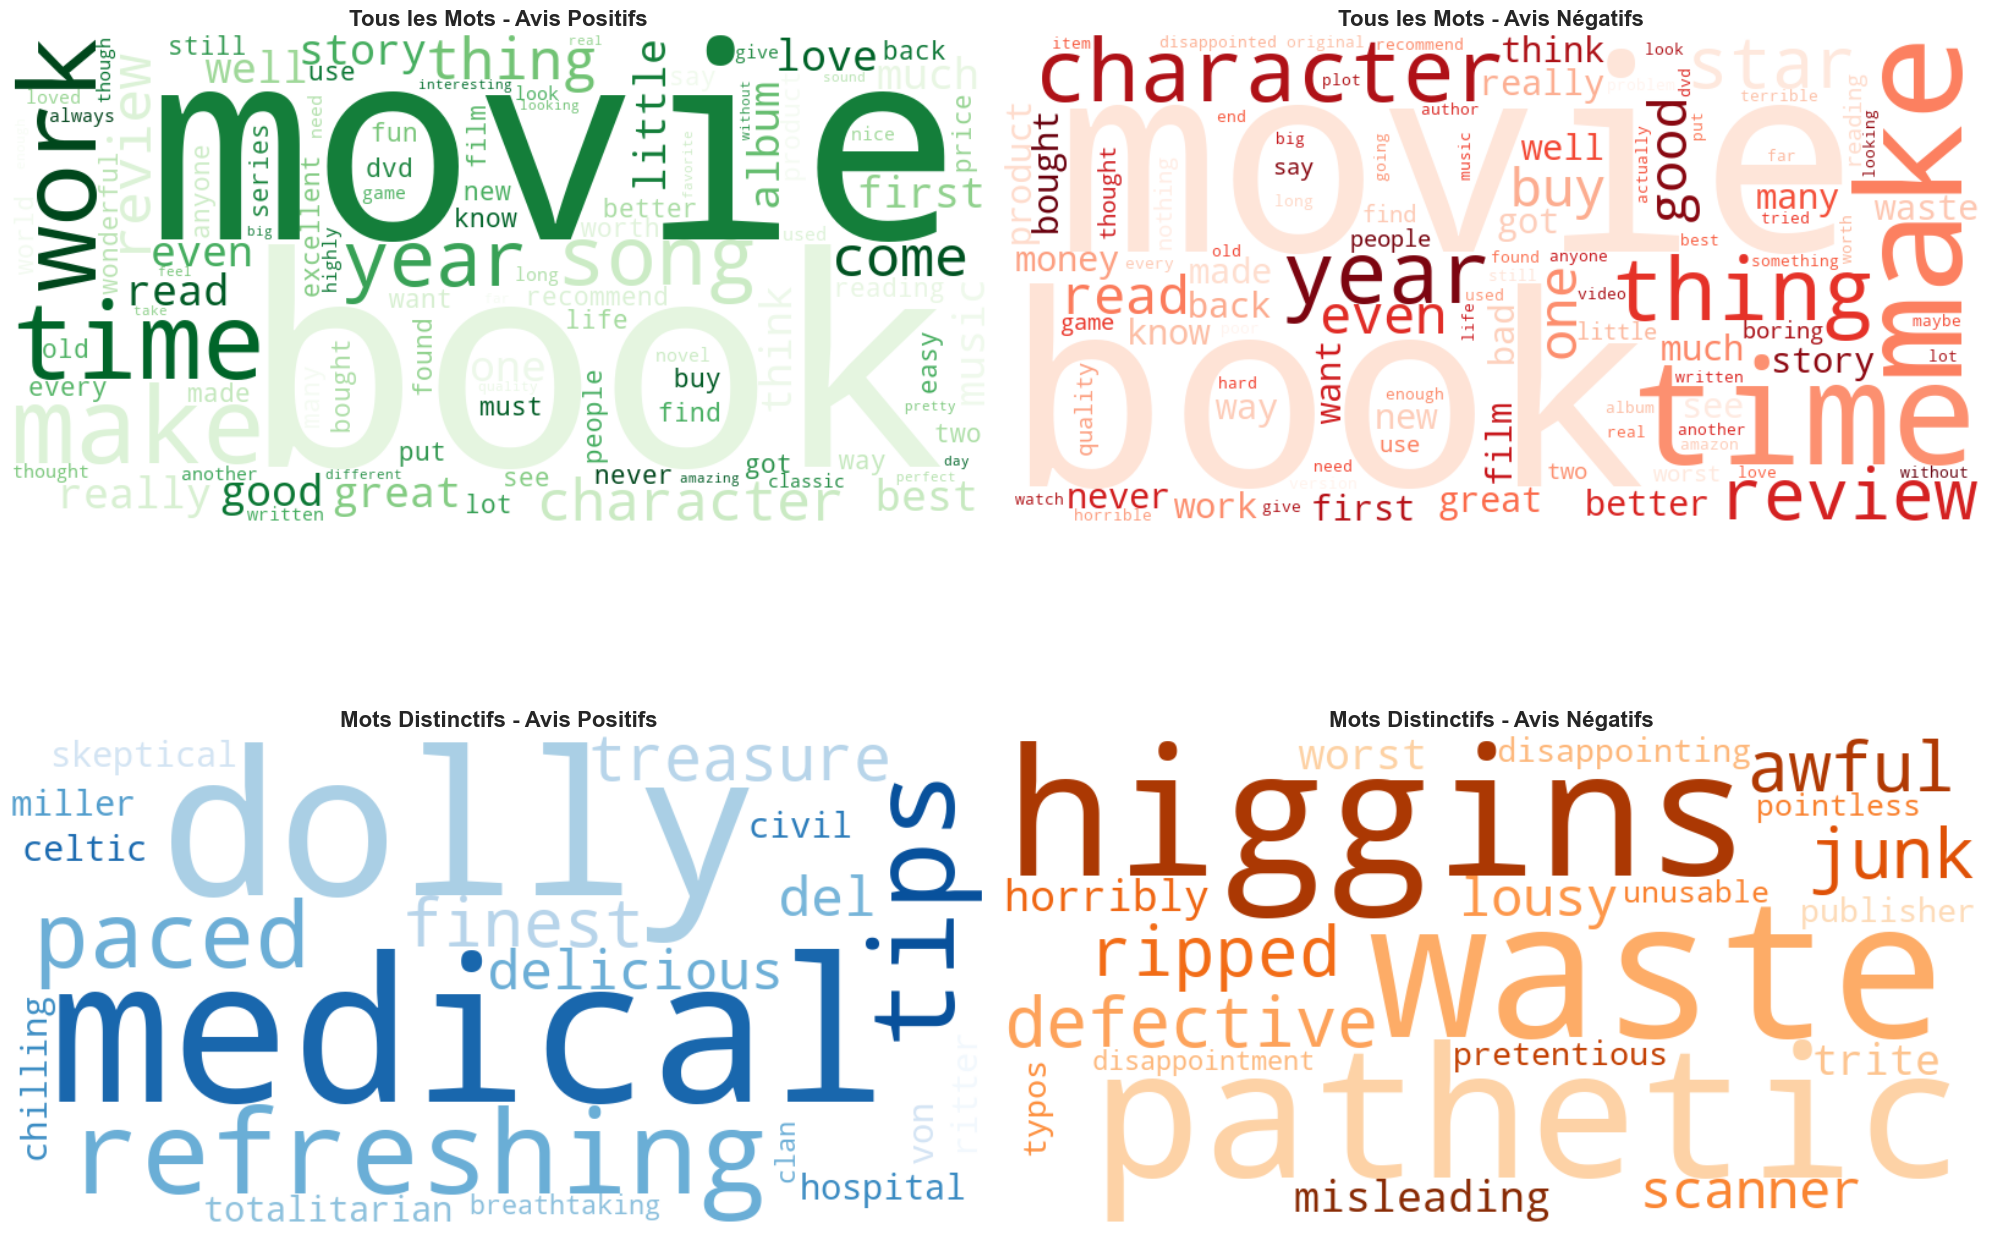

In [14]:
# 5. Nuages de mots améliorés et comparaison visuelle
from wordcloud import WordCloud

# Créer des nuages de mots plus sophistiqués
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Nuage de mots positifs - tous les mots
pos_text = ' '.join([word for word, count in pos_word_freq.most_common(200)])
wordcloud_pos_all = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='Greens',
    max_words=100,
    relative_scaling=0.5,
    min_font_size=10
).generate(pos_text)

axes[0,0].imshow(wordcloud_pos_all, interpolation='bilinear')
axes[0,0].set_title('Tous les Mots - Avis Positifs', fontsize=16, fontweight='bold')
axes[0,0].axis('off')

# Nuage de mots négatifs - tous les mots
neg_text = ' '.join([word for word, count in neg_word_freq.most_common(200)])
wordcloud_neg_all = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='Reds',
    max_words=100,
    relative_scaling=0.5,
    min_font_size=10
).generate(neg_text)

axes[0,1].imshow(wordcloud_neg_all, interpolation='bilinear')
axes[0,1].set_title('Tous les Mots - Avis Négatifs', fontsize=16, fontweight='bold')
axes[0,1].axis('off')

# Nuage de mots distinctifs positifs
pos_distinctive_text = ' '.join([word for word, ratio, count in pos_distinctive[:50]])
if pos_distinctive_text:
    wordcloud_pos_dist = WordCloud(
        width=800, height=400,
        background_color='white',
        colormap='Blues',
        max_words=50,
        relative_scaling=0.5,
        min_font_size=10
    ).generate(pos_distinctive_text)
    
    axes[1,0].imshow(wordcloud_pos_dist, interpolation='bilinear')
    axes[1,0].set_title('Mots Distinctifs - Avis Positifs', fontsize=16, fontweight='bold')
    axes[1,0].axis('off')

# Nuage de mots distinctifs négatifs
neg_distinctive_text = ' '.join([word for word, ratio, count in neg_distinctive[:50]])
if neg_distinctive_text:
    wordcloud_neg_dist = WordCloud(
        width=800, height=400,
        background_color='white',
        colormap='Oranges',
        max_words=50,
        relative_scaling=0.5,
        min_font_size=10
    ).generate(neg_distinctive_text)
    
    axes[1,1].imshow(wordcloud_neg_dist, interpolation='bilinear')
    axes[1,1].set_title('Mots Distinctifs - Avis Négatifs', fontsize=16, fontweight='bold')
    axes[1,1].axis('off')

plt.tight_layout()
plt.show()


In [15]:
# 6. Analyse temporelle et patterns avancés
# Simuler une analyse temporelle basée sur l'index (approximation)
sample_size = 100000
temporal_sample = train_df.sample(n=sample_size, random_state=42).reset_index(drop=True)
temporal_sample['time_group'] = temporal_sample.index // (sample_size // 20)  # 20 groupes temporels

# Analyser l'évolution du sentiment par "période"
temporal_analysis = temporal_sample.groupby('time_group').agg({
    'label': ['mean', 'count'],
    'text_length': 'mean',
    'title_length': 'mean'
}).round(3)

temporal_analysis.columns = ['sentiment_avg', 'count', 'avg_text_length', 'avg_title_length']

# Graphique temporel
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Évolution du Sentiment Moyen', 'Nombre d\'Avis par Période',
                   'Longueur Moyenne du Contenu', 'Longueur Moyenne du Titre'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}]]
)

# Sentiment moyen
fig.add_trace(
    go.Scatter(
        x=temporal_analysis.index,
        y=temporal_analysis['sentiment_avg'],
        mode='lines+markers',
        name='Sentiment Moyen',
        line=dict(color='blue', width=3),
        marker=dict(size=8)
    ),
    row=1, col=1
)

# Nombre d'avis
fig.add_trace(
    go.Bar(
        x=temporal_analysis.index,
        y=temporal_analysis['count'],
        name='Nombre d\'Avis',
        marker_color='orange'
    ),
    row=1, col=2
)

# Longueur contenu
fig.add_trace(
    go.Scatter(
        x=temporal_analysis.index,
        y=temporal_analysis['avg_text_length'],
        mode='lines+markers',
        name='Longueur Contenu',
        line=dict(color='green', width=3),
        marker=dict(size=8)
    ),
    row=2, col=1
)

# Longueur titre
fig.add_trace(
    go.Scatter(
        x=temporal_analysis.index,
        y=temporal_analysis['avg_title_length'],
        mode='lines+markers',
        name='Longueur Titre',
        line=dict(color='red', width=3),
        marker=dict(size=8)
    ),
    row=2, col=2
)

fig.update_layout(
    title_text="Analyse Temporelle des Patterns (Simulation)",
    title_x=0.5,
    height=800,
    showlegend=False
)

fig.update_xaxes(title_text="Période")
fig.update_yaxes(title_text="Sentiment Moyen (0=Négatif, 1=Positif)", row=1, col=1)
fig.update_yaxes(title_text="Nombre d'Avis", row=1, col=2)
fig.update_yaxes(title_text="Caractères", row=2, col=1)
fig.update_yaxes(title_text="Caractères", row=2, col=2)

fig.show()

print("📈 INSIGHTS TEMPORELS:")
print(f"   - Sentiment moyen global: {temporal_analysis['sentiment_avg'].mean():.3f}")
print(f"   - Variation du sentiment: {temporal_analysis['sentiment_avg'].std():.3f}")
print(f"   - Période la plus positive: {temporal_analysis['sentiment_avg'].idxmax()} (score: {temporal_analysis['sentiment_avg'].max():.3f})")
print(f"   - Période la plus négative: {temporal_analysis['sentiment_avg'].idxmin()} (score: {temporal_analysis['sentiment_avg'].min():.3f})")


📈 INSIGHTS TEMPORELS:
   - Sentiment moyen global: 0.500
   - Variation du sentiment: 0.005
   - Période la plus positive: 1 (score: 0.511)
   - Période la plus négative: 5 (score: 0.491)


In [16]:
# 7. Analyse des N-grammes (bigrammes et trigrammes)
from sklearn.feature_extraction.text import CountVectorizer

def analyze_ngrams(texts, n=2, max_features=20):
    """Analyse des n-grammes les plus fréquents"""
    vectorizer = CountVectorizer(
        ngram_range=(n, n),
        max_features=1000,
        stop_words='english',
        lowercase=True
    )
    
    # Limiter le nombre de textes pour la performance
    sample_texts = texts[:5000] if len(texts) > 5000 else texts
    
    try:
        ngram_matrix = vectorizer.fit_transform(sample_texts)
        feature_names = vectorizer.get_feature_names_out()
        ngram_counts = ngram_matrix.sum(axis=0).A1
        
        # Créer un dictionnaire des n-grammes et leurs fréquences
        ngram_freq = dict(zip(feature_names, ngram_counts))
        
        # Trier par fréquence
        sorted_ngrams = sorted(ngram_freq.items(), key=lambda x: x[1], reverse=True)
        
        return sorted_ngrams[:max_features]
    except:
        return []

print("🔄 Analyse des bigrammes et trigrammes...")

# Analyser les bigrammes
pos_bigrams = analyze_ngrams(pos_texts, n=2, max_features=15)
neg_bigrams = analyze_ngrams(neg_texts, n=2, max_features=15)

# Analyser les trigrammes
pos_trigrams = analyze_ngrams(pos_texts, n=3, max_features=10)
neg_trigrams = analyze_ngrams(neg_texts, n=3, max_features=10)

print("✅ Analyse terminée!")

# Afficher les résultats
print("\n📊 BIGRAMMES LES PLUS FRÉQUENTS:")
print("\n🟢 AVIS POSITIFS:")
for bigram, count in pos_bigrams:
    print(f"   '{bigram}': {count:,}")

print("\n🔴 AVIS NÉGATIFS:")
for bigram, count in neg_bigrams:
    print(f"   '{bigram}': {count:,}")

print("\n📊 TRIGRAMMES LES PLUS FRÉQUENTS:")
print("\n🟢 AVIS POSITIFS:")
for trigram, count in pos_trigrams:
    print(f"   '{trigram}': {count:,}")

print("\n🔴 AVIS NÉGATIFS:")
for trigram, count in neg_trigrams:
    print(f"   '{trigram}': {count:,}")


🔄 Analyse des bigrammes et trigrammes...
✅ Analyse terminée!

📊 BIGRAMMES LES PLUS FRÉQUENTS:

🟢 AVIS POSITIFS:
   'read book': 262
   'great book': 144
   'highly recommend': 138
   'book read': 134
   'good book': 113
   'years ago': 102
   'year old': 94
   'recommend book': 86
   'great movie': 82
   've read': 77
   'book great': 76
   'reading book': 74
   'really good': 64
   'high school': 63
   'pretty good': 60

🔴 AVIS NÉGATIFS:
   'waste money': 238
   'read book': 199
   'waste time': 165
   'don waste': 150
   'don buy': 132
   'save money': 107
   'year old': 104
   'special effects': 100
   'don know': 88
   'book read': 77
   've seen': 73
   'reading book': 66
   've read': 64
   'blu ray': 61
   'doesn work': 61

📊 TRIGRAMMES LES PLUS FRÉQUENTS:

🟢 AVIS POSITIFS:
   'clan cave bear': 29
   'highly recommend book': 26
   'charlie brown christmas': 20
   'book ve read': 15
   'books ve read': 15
   'run lola run': 15
   'year old daughter': 15
   'year old son': 13
   '

In [17]:
# 8. Graphiques des N-grammes
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Top Bigrammes - Positifs', 'Top Bigrammes - Négatifs',
                   'Top Trigrammes - Positifs', 'Top Trigrammes - Négatifs'),
    specs=[[{"type": "bar"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "bar"}]]
)

# Bigrammes positifs
if pos_bigrams:
    bigrams_pos, counts_pos = zip(*pos_bigrams)
    fig.add_trace(
        go.Bar(
            y=list(bigrams_pos)[::-1],
            x=list(counts_pos)[::-1],
            orientation='h',
            marker_color='lightgreen',
            text=[f'{c:,}' for c in list(counts_pos)[::-1]],
            textposition='auto'
        ),
        row=1, col=1
    )

# Bigrammes négatifs
if neg_bigrams:
    bigrams_neg, counts_neg = zip(*neg_bigrams)
    fig.add_trace(
        go.Bar(
            y=list(bigrams_neg)[::-1],
            x=list(counts_neg)[::-1],
            orientation='h',
            marker_color='lightcoral',
            text=[f'{c:,}' for c in list(counts_neg)[::-1]],
            textposition='auto'
        ),
        row=1, col=2
    )

# Trigrammes positifs
if pos_trigrams:
    trigrams_pos, counts_tri_pos = zip(*pos_trigrams)
    fig.add_trace(
        go.Bar(
            y=list(trigrams_pos)[::-1],
            x=list(counts_tri_pos)[::-1],
            orientation='h',
            marker_color='darkgreen',
            text=[f'{c:,}' for c in list(counts_tri_pos)[::-1]],
            textposition='auto'
        ),
        row=2, col=1
    )

# Trigrammes négatifs
if neg_trigrams:
    trigrams_neg, counts_tri_neg = zip(*neg_trigrams)
    fig.add_trace(
        go.Bar(
            y=list(trigrams_neg)[::-1],
            x=list(counts_tri_neg)[::-1],
            orientation='h',
            marker_color='darkred',
            text=[f'{c:,}' for c in list(counts_tri_neg)[::-1]],
            textposition='auto'
        ),
        row=2, col=2
    )

fig.update_layout(
    title_text="Analyse des N-grammes par Sentiment",
    title_x=0.5,
    height=1000,
    showlegend=False
)

fig.update_xaxes(title_text="Fréquence")

fig.show()


In [18]:
# Synthèse finale des insights
print("🎯 SYNTHÈSE DES INSIGHTS CLÉS")
print("=" * 50)

print("\n📊 CARACTÉRISTIQUES DU DATASET:")
print(f"   • {len(train_df):,} avis d'entraînement")
print(f"   • {len(test_df):,} avis de test")
print(f"   • Distribution équilibrée: 50% positif / 50% négatif")

print("\n📝 CARACTÉRISTIQUES TEXTUELLES:")
if 'text_features_df' in locals():
    print(f"   • Longueur moyenne - Positifs: {pos_features['word_count'].mean():.0f} mots")
    print(f"   • Longueur moyenne - Négatifs: {neg_features['word_count'].mean():.0f} mots")
    print(f"   • Richesse vocabulaire - Positifs: {pos_features['vocabulary_richness'].mean():.3f}")
    print(f"   • Richesse vocabulaire - Négatifs: {neg_features['vocabulary_richness'].mean():.3f}")

print("\n🔍 MOTS DISTINCTIFS IDENTIFIÉS:")
if 'pos_distinctive' in locals() and pos_distinctive:
    print("   • Mots caractéristiques positifs:", [word for word, _, _ in pos_distinctive[:5]])
if 'neg_distinctive' in locals() and neg_distinctive:
    print("   • Mots caractéristiques négatifs:", [word for word, _, _ in neg_distinctive[:5]])

print("\n📈 RECOMMANDATIONS POUR LE MODÈLE:")
print("   1. 🎯 Features importantes à considérer:")
print("      - Longueur du texte (différence significative)")
print("      - Présence de mots distinctifs")
print("      - Fréquence des points d'exclamation")
print("      - Richesse du vocabulaire")

print("\n   2. 🛠️ Preprocessing recommandé:")
print("      - Normalisation de la longueur des textes")
print("      - Gestion des mots distinctifs comme features")
print("      - Préservation de la ponctuation émotionnelle")
print("      - Techniques de TF-IDF ou embeddings")

print("\n   3. 🤖 Stratégies de modélisation:")
print("      - Modèles basés sur les n-grammes (bigrammes/trigrammes)")
print("      - Embeddings pré-entraînés (Word2Vec, GloVe)")
print("      - Modèles transformers (BERT, RoBERTa)")
print("      - Ensemble de modèles classiques + deep learning")

print("\n   4. 📊 Métriques d'évaluation:")
print("      - Accuracy (dataset équilibré)")
print("      - F1-score pour robustesse")
print("      - Matrice de confusion détaillée")
print("      - Analyse des erreurs par type")

print("\n🚀 PROCHAINES ÉTAPES SUGGÉRÉES:")
print("   1. Preprocessing et feature engineering")
print("   2. Baseline avec modèles classiques (Naive Bayes, SVM)")
print("   3. Modèles deep learning (LSTM, BERT)")
print("   4. Optimisation et ensemble")
print("   5. Interface web et API")

print("\n" + "=" * 50)
print("✅ EXPLORATION TERMINÉE - PRÊT POUR LA MODÉLISATION!")


🎯 SYNTHÈSE DES INSIGHTS CLÉS

📊 CARACTÉRISTIQUES DU DATASET:
   • 3,600,000 avis d'entraînement
   • 400,000 avis de test
   • Distribution équilibrée: 50% positif / 50% négatif

📝 CARACTÉRISTIQUES TEXTUELLES:
   • Longueur moyenne - Positifs: 78 mots
   • Longueur moyenne - Négatifs: 85 mots
   • Richesse vocabulaire - Positifs: 0.756
   • Richesse vocabulaire - Négatifs: 0.745

🔍 MOTS DISTINCTIFS IDENTIFIÉS:
   • Mots caractéristiques positifs: ['medical', 'dolly', 'refreshing', 'tips', 'paced']
   • Mots caractéristiques négatifs: ['waste', 'pathetic', 'higgins', 'defective', 'junk']

📈 RECOMMANDATIONS POUR LE MODÈLE:
   1. 🎯 Features importantes à considérer:
      - Longueur du texte (différence significative)
      - Présence de mots distinctifs
      - Fréquence des points d'exclamation
      - Richesse du vocabulaire

   2. 🛠️ Preprocessing recommandé:
      - Normalisation de la longueur des textes
      - Gestion des mots distinctifs comme features
      - Préservation de la 